In [1]:
%matplotlib inline

import overpass
import json
import geopandas as gp
from shapely import geometry
import matplotlib.pyplot as plt

In [4]:
#get london boundary
api = overpass.API()
response = api.Get('relation(175342);>;')
response = json.loads(str(response))
out = open('temp_geo.geojson','w')
out.write(json.dumps(response,indent=4))

london = gp.read_file('temp_geo.geojson')
response = (x for x in response['features'] if x['geometry']['type']=='LineString')
london = gp.GeoDataFrame.from_features(response['features'])
london = gp.GeoDataFrame.from_features(response['features'])
london = london[1:]
print london.shape
print london.head()
london.plot()

TypeError: 'generator' object has no attribute '__getitem__'

In [3]:
coord_list = []
temp = london['geometry'][1].coords[0]
for line in london['geometry']:
    for coords in line.coords:
        dist = Point(coords).distance(Point(temp))
        if dist < 1:
            coord_list.append(coords)
        temp = coords
 
#london_poly = Polygon(coord_list)
#london_poly = gp.GeoSeries(Point(x[0],x[1]) for x in coord_list)
london_poly = MultiPoint(coord_list).convex_hull
#london_poly.plot()
london_poly

NameError: name 'london' is not defined

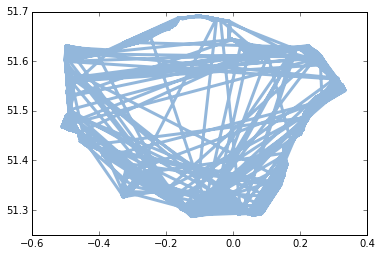

In [187]:
poly = geometry.Polygon([[p[0], p[1]] for p in coord_list])
x,y = poly.exterior.xy
plt.plot(x, y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
#poly.area

In [69]:
london.head()

,admin_level,boat,boundary,geometry,history,left:county,left:district,motorboat,name,name:en,name:lt,note,ref,right:borough,right:city,right:county,right:district,source,tidal,waterway
0,5,NaN,administrative,"(-0.1243197, 51.2867602)",NaN,Surrey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greater London,NaN,OS_OpenData_Boundary-Line,NaN,NaN
1,5,NaN,administrative,"(0.1488766, 51.4084835)",NaN,Kent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greater London,NaN,OS_OpenData_BoundaryLine,NaN,NaN
2,5,NaN,administrative,"(0.042369, 51.2926742)",NaN,Greater London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kent,NaN,OS_OpenData_BoundaryLine,NaN,NaN
3,5,NaN,administrative,"(0.1529063, 51.408709)",NaN,Kent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greater London,NaN,OS_OpenData_BoundaryLine,NaN,NaN
4,5,NaN,administrative,"(-0.1243197, 51.2867602)",NaN,Surrey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greater London,NaN,OS_OpenData_Boundary-Line,NaN,NaN


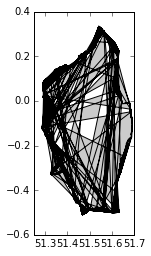

In [31]:
london['geometry'] = london['geometry'].apply(lambda x: x.coords[0])
#london = london['geometry'].apply(lambda x: Polygon(x.tolist())).reset_index()
gp.GeoSeries(london).plot()

In [71]:
for i in response["features"]:
    print i['geometry']['coordinates']

[-0.1276474, 51.5073219]
[-0.4856916, 51.5023353]
[0.1969595, 51.625565]
[-0.4837316, 51.5664665]
[-0.0091689, 51.3339052]
[-0.0492933, 51.3326946]
[-0.0249188, 51.3385322]
[-0.0279915, 51.3382075]
[-0.0323247, 51.3374665]
[-0.4933923, 51.5838101]
[-0.0487759, 51.3287192]
[-0.0602465, 51.320041]
[-0.059619, 51.3200837]
[-0.0590633, 51.3202265]
[-0.0587821, 51.3202587]
[-0.0584195, 51.320384]
[-0.0579075, 51.3207635]
[-0.0576156, 51.3210065]
[-0.0570402, 51.3213701]
[-0.0567352, 51.3215242]
[-0.0565116, 51.3215861]
[-0.0562786, 51.321665]
[-0.0700552, 51.3188937]
[-0.0581378, 51.3205969]
[-0.1543414, 51.31032]
[-0.0944218, 51.2994627]
[-0.0943038, 51.2994401]
[-0.1583775, 51.310988]
[-0.1576644, 51.3109317]
[-0.1564921, 51.3104672]
[-0.1550496, 51.3057934]
[-83.448253, 39.8864493]
[-84.0832646, 37.1289771]
[-84.111873, 37.148973]
[-84.111112, 37.148734]
[-84.112885, 37.149149]
[-84.110986, 37.142061]
[-84.111474, 37.148866]
[-84.1071, 37.123852]
[-0.1444495, 51.3005432]
[-83.4530497, 39

In [73]:
from area import area
obj = {'type':'Polygon','coordinates':[[[-180,-90],[-180,90],[180,90],[180,-90],[-180,-90]]]}
area(obj)

ImportError: No module named area